# Unitary perturbations of Boolean networks 

Modules importation. 
biolqm is used to apply the node and edge perturbations and compute trapspaces of wild-type and mutant Boolean networks
numpy and matplotlib are used for the vizualization of results.

In [472]:
import biolqm
import ginsim
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

numpy: 1.17.2
matplotlib: 3.1.1


## Wild-type model 

Loading of the model in bnet format with BioLQM

In [473]:
lqm = biolqm.load("/tmp/colomotofg3_rtwt_small.bnet")

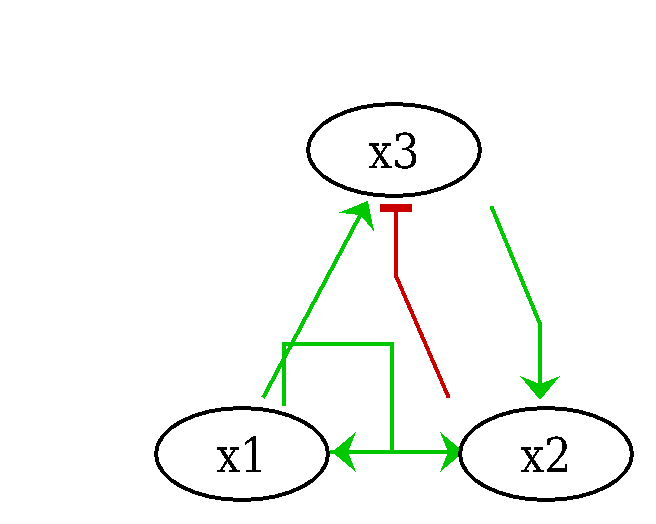

In [476]:
biolqm.autolayout(lqm, method="patchwork")
lrg = biolqm.to_ginsim(lqm)
ginsim.show(lrg)


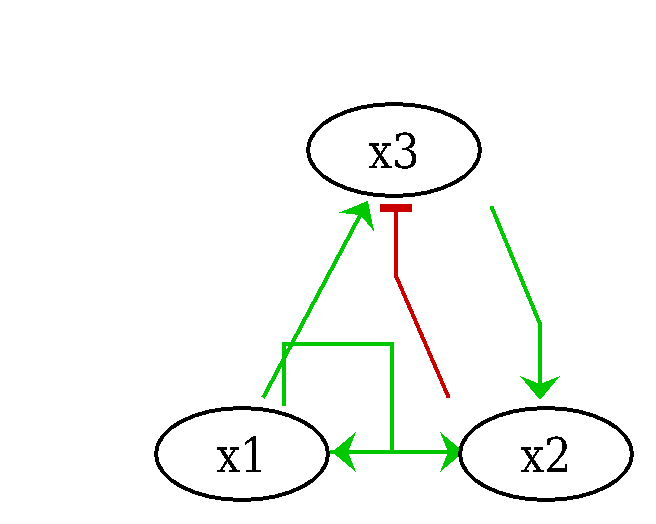

In [477]:
lrg = biolqm.to_ginsim(lqm, layout_method="circo")
ginsim.show(lrg)

Computation of wild-type trapspaces 

# computing graph layout...


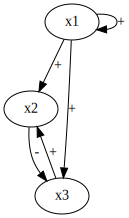

In [479]:
ig = biolqm.influence_graph(lqm)
ig

In [190]:
wt_traps=biolqm.trapspace(lqm, "terminal")
wt_traps

[{'x1': 1, 'x2': 1, 'x3': 1}, {'x1': 0, 'x2': 0, 'x3': 1}]

## Partition of unitary perturbations

### Generation of all possible unitary edge and node perturbations 

In [452]:
def unitary_perturbations(model):
    nodes_ko={str(c)+'%0' for c in model.getComponents()}
    nodes_oe={str(c)+'%1' for c in model.getComponents()}
    
    molecules_perturbation=dict({'nodes_ko':list(nodes_ko),'nodes_oe':list(nodes_oe)}) 
    
    ig = biolqm.influence_graph(model)
    positive_influences=[(source,target) for (source,target,sign) in list(ig.edges(data=True)) if sign['sign']==1]
    p_inf_ko={str(source) +':'+str(target)+'%0' for (source,target) in positive_influences}
    p_inf_oe={str(source) +':'+str(target)+'%1' for (source,target) in positive_influences}
    
    positive_influences_perturbations=dict({'positive_influences_ko':list(p_inf_ko),'positive_influences_oe':list(nodes_oe)})
    
    negative_influences=[(source,target) for (source,target,sign) in list(ig.edges(data=True)) if sign['sign']==-1]
    n_inf_ko={str(source) +':'+str(target)+'%0' for (source,target) in negative_influences}
    n_inf_oe={str(source) +':'+str(target)+'%1' for (source,target) in negative_influences}
    
    negative_influences_perturbations=dict({'negative_influences_ko':list(p_inf_ko),'negative_influences_oe':list(nodes_oe)})
    
    
    unitary_perturbations=dict({'molecules_perturbation':molecules_perturbation,'positive_influence_perturbation':positive_influences_perturbations,'negative_influence_perturbation':negative_influences_perturbations})
    return unitary_perturbations

The list of perturbations of nodes is a list of strings of the form "variable%value" for each variable of the network and each value in (0,1)

In [455]:
unit_pert_dict=unitary_perturbations(lqm)

In [459]:
set(unit_pert_dict['molecules_perturbation']['nodes_ko'])

{'x1%0', 'x2%0', 'x3%0'}

In [261]:
nodes_p={str(c)+'%0' for c in lqm.getComponents()}.union({str(c)+'%1' for c in lqm.getComponents()})
nodes_p

{'x1%0', 'x1%1', 'x2%0', 'x2%1', 'x3%0', 'x3%1'}

In [427]:
nodes_p1=[{str(c)+'%0' for c in lqm.getComponents()},{str(c)+'%1' for c in lqm.getComponents()}]
nodes_p1

[{'x1%0', 'x2%0', 'x3%0'}, {'x1%1', 'x2%1', 'x3%1'}]

The list of perturbations of edges is a list of strings of the form "source:target%value" for each (source,target) couple (ie, interaction) of the network and each value in (0,1)

In [262]:
ig = biolqm.influence_graph(lqm)
list(ig.edges())

[('x1', 'x1'), ('x1', 'x2'), ('x1', 'x3'), ('x2', 'x3'), ('x3', 'x2')]

In [263]:
edges_p={str(source) +':'+str(target)+'%0' for (source,target) in list(ig.edges())}.union({str(source) +':'+str(target)+'%1' for (source,target) in list(ig.edges())})

In [429]:
edges_p1=[{str(source) +':'+str(target)+'%0' for (source,target) in list(ig.edges())},{str(source) +':'+str(target)+'%1' for (source,target) in list(ig.edges())}]
edges_p1

[{'x1:x1%0', 'x1:x2%0', 'x1:x3%0', 'x2:x3%0', 'x3:x2%0'},
 {'x1:x1%1', 'x1:x2%1', 'x1:x3%1', 'x2:x3%1', 'x3:x2%1'}]

In [434]:
positive_influences=[(source,target) for (source,target,sign) in list(ig.edges(data=True)) if sign['sign']==1]

In [442]:
p_inf_ko={str(source) +':'+str(target)+'%0' for (source,target) in positive_influences}
p_inf_ko

{'x1:x1%0', 'x1:x2%0', 'x1:x3%0', 'x3:x2%0'}

In [436]:
negative_influences=[(source,target) for (source,target,sign) in list(ig.edges(data=True)) if sign['sign']==-1]

In [440]:
positive_influences

[('x1', 'x1'), ('x1', 'x2'), ('x1', 'x3'), ('x3', 'x2')]

In [265]:
unit_perturbations_set=nodes_p.union(edges_p)
unit_perturbations_set

{'x1%0',
 'x1%1',
 'x1:x1%0',
 'x1:x1%1',
 'x1:x2%0',
 'x1:x2%1',
 'x1:x3%0',
 'x1:x3%1',
 'x2%0',
 'x2%1',
 'x2:x3%0',
 'x2:x3%1',
 'x3%0',
 'x3%1',
 'x3:x2%0',
 'x3:x2%1'}

In [191]:
ep=["x1:x1%1","x1:x1%0","x1:x2%1","x1:x2%0","x1:x3%1","x1:x3%0","x2:x3%0","x2:x3%1","x3:x2%0","x3:x2%1"]

In [192]:
np2=["x1%1","x2%1","x3%1","x1%0","x2%0","x3%0"]

### Partition of perturbations 

In [454]:
## From a set of nodes perturbation and a set of edges perturbation, partition each set in a perturbation-only and a perturbation-equivalent set
def unit_perturbation_partitioning(nodes_p,edges_p):
    ##Computes sets of networks obtained by unitary pertubations of 1) nodes 2) edges
    node_net={(pert,biolqm.perturbation(lqm, pert)) for pert in nodes_p}
    edge_net={(pert,biolqm.perturbation(lqm, pert)) for pert in edges_p}
    ##A node and an edge perturbation are equivalent if they lead to the same network
    node_edge_eq={(node,edge,net1) for (node,net1) in node_net for (edge,net2) in edge_net if biolqm.to_minibn(net1)==biolqm.to_minibn(net2)}   
    ##set of  node perturbation having at least an equivalent edge perturbation
    nodes_eq={node for (node,edge,net) in node_edge_eq}
    ##set of  edge perturbation equivalent to an edge perturbation
    edges_eq={edge for (node,edge,net) in node_edge_eq}
    ##list of  (node,{edge_set}) equivalent perturbations
    node_edge=list((node2,{edge for (node1,edge,net) in node_edge_eq if node1==node2}) for node2 in nodes_eq)
    ##list of  node-only perturbations
    node_only=set(nodes_p-nodes_eq)
    ##list of  edge-only perturbations
    edge_only=set(edges_p-edges_eq)
    return dict({'node-eq':nodes_eq,'edge-eq' : edges_eq,'node-only' : node_only,'edge-only':edge_only})

In [466]:
def global_partitioning(unitary_pert_dict):
    nodes_ko=set(unit_pert_dict['molecules_perturbation']['nodes_ko'])
    p_inf_ko=set(unit_pert_dict['positive_influence_perturbation']['positive_influences_ko'])
    nodes_ko_p_inf_ko=unit_perturbation_partitioning(nodes_ko,p_inf_ko)
    
    nodes_oe=set(unit_pert_dict['molecules_perturbation']['nodes_oe'])
    p_inf_oe=set(unit_pert_dict['positive_influence_perturbation']['positive_influences_oe'])
    nodes_oe_p_inf_oe=unit_perturbation_partitioning(nodes_ko,p_inf_ko)
    
    nodes_ko=set(unit_pert_dict['molecules_perturbation']['nodes_ko'])
    p_inf_oe=set(unit_pert_dict['positive_influence_perturbation']['positive_influences_ko'])
    nodes_ko_p_inf_ko=unit_perturbation_partitioning(nodes_ko,p_inf_ko)
    
    glob_partition=dict({'nodes_ko_p_inf_ko':nodes_ko_p_inf_ko})
    return glob_partition

In [460]:
set(unit_pert_dict['molecules_perturbation']['nodes_ko'])

{'x1%0', 'x2%0', 'x3%0'}

In [467]:
a=global_partitioning(unit_pert_dict)
a

{'nodes_ko_p_inf_ko': {'node-eq': {'x1%0', 'x2%0'},
  'edge-eq': {'x1:x1%0', 'x1:x2%0', 'x3:x2%0'},
  'node-only': {'x3%0'},
  'edge-only': {'x1:x3%0'}}}

In [461]:
unit_pert_dict

{'molecules_perturbation': {'nodes_ko': ['x1%0', 'x3%0', 'x2%0'],
  'nodes_oe': ['x1%1', 'x3%1', 'x2%1']},
 'positive_influence_perturbation': {'positive_influences_ko': ['x1:x3%0',
   'x1:x2%0',
   'x1:x1%0',
   'x3:x2%0'],
  'positive_influences_oe': ['x1%1', 'x3%1', 'x2%1']},
 'negative_influence_perturbation': {'negative_influences_ko': ['x1:x3%0',
   'x1:x2%0',
   'x1:x1%0',
   'x3:x2%0'],
  'negative_influences_oe': ['x1%1', 'x3%1', 'x2%1']}}

In [374]:
partition_dict=unit_perturbation_partitioning(nodes_p,edges_p)

## Vizualisation  

In [376]:
partition_dict

{'node-eq': {'x1%0', 'x1%1', 'x2%0', 'x3%1'},
 'edge-eq': {'x1:x1%0', 'x1:x1%1', 'x1:x2%0', 'x1:x3%1', 'x2:x3%0', 'x3:x2%0'},
 'node-only': {'x2%1', 'x3%0'},
 'edge-only': {'x1:x2%1', 'x1:x3%0', 'x2:x3%1', 'x3:x2%1'}}

In [377]:
def partition_pert_count(partition_dict):
    node_eq=len(partition_dict['node-eq'])
    edge_eq=len(partition_dict['edge-eq'])
    node_only=len(partition_dict['node-only'])
    edge_only=len(partition_dict['edge-only'])
    return [node_eq,edge_eq,node_only,edge_only]

In [379]:
res2=partition_pert_count(partition_dict)
res2

[4, 6, 2, 4]

In [383]:
x = ["node","edge"]
y1 = np.array([res2[0],res2[1]])
y2 = np.array([res2[2],res2[3]])

# memo of sample number
snum = y1+y2

# normalization
#y1 = y1/snum*100.
#y2 = y2/snum*100.

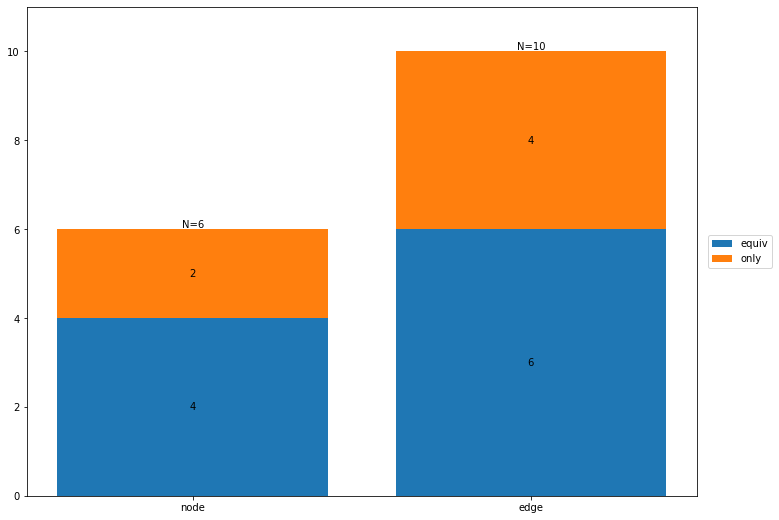

In [395]:
plt.figure(figsize=(12,9))

# stack bars
plt.bar(x, y1, label='equiv')
plt.bar(x, y2 ,bottom=y1,label='only')


# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,11)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

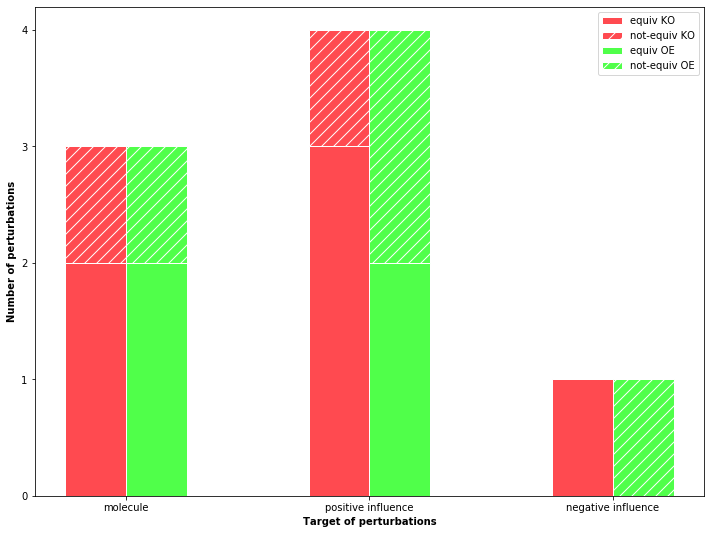

In [487]:

# libraries
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars11 = [2, 3, 1]
bars12 = [1, 1,0]
bars21 = [2, 2,0]
bars22 = [1, 2,1]
 
# Set position of bar on X axis
r1 = np.arange(len(bars11))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars11, color='#ff4a50', width=barWidth, edgecolor='white', label='equiv KO')
plt.bar(r1, bars12, color='#ff4a50', hatch='//', bottom=bars11, width=barWidth, edgecolor='white', label='not-equiv KO')
plt.bar(r2, bars21, color='#50ff4a', width=barWidth, edgecolor='white', label='equiv OE')
plt.bar(r2, bars22, color='#50ff4a', hatch='//', bottom=bars21, width=barWidth, edgecolor='white', label='not-equiv OE')


 
# Add xticks on the middle of the group bars
plt.xlabel('Target of perturbations', fontweight='bold')
plt.ylabel('Number of perturbations', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars11))], ['molecule', 'positive influence', 'negative influence'])
plt.yticks(np.arange(0, 5, 1))

# Create legend & Show graphic
plt.legend()
plt.show()

# 2 Classification of unitary perturbations

In [203]:
def trapfamily(mod,pert_list):
    netlist=list(map(lambda pert: biolqm.perturbation(mod, pert),pert_list))
    mut_trapslist=list(map(lambda net: biolqm.trapspace(net, "terminal"),netlist))
    return mut_trapslist

The following function computes all the trapspaces of each mutant networks derived from the wild-type network mod by unitary perturbations of the list pert_list.

## 2.1 Perturbations types

## 2.1.1 Edgetic 

In [204]:
edgetic_pert=['x1:x3%0', 'x2:x3%1', 'x3:x2%1', 'x1:x2%1']

In [205]:
edgetic_tf=trapfamily(lqm,edgetic_pert)
edgetic_tf

[[{'x1': 0, 'x2': 0, 'x3': 1}, {'x1': 1, 'x2': 254, 'x3': 254}],
 [{'x1': 1, 'x2': 1, 'x3': 1}, {'x1': 0, 'x2': 0, 'x3': 0}],
 [{'x1': 1, 'x2': 1, 'x3': 1}, {'x1': 0, 'x2': 0, 'x3': 1}],
 [{'x1': 1, 'x2': 1, 'x3': 1}, {'x1': 0, 'x2': 254, 'x3': 254}]]

### 2.1.2 Node-edge and edge-node

In [206]:
edge_node_pert=["x1:x1%1","x1:x1%0","x1:x2%0","x1:x3%1","x2:x3%0","x3:x2%0"]
node_edge_pert=["x1%1","x1%0","x2%0","x3%1"]

In [207]:
node_edge_tf=trapfamily(lqm,node_edge_pert)
node_edge_tf

[[{'x1': 1, 'x2': 1, 'x3': 1}],
 [{'x1': 0, 'x2': 0, 'x3': 1}],
 [{'x1': 1, 'x2': 0, 'x3': 1}, {'x1': 0, 'x2': 0, 'x3': 1}],
 [{'x1': 1, 'x2': 1, 'x3': 1}, {'x1': 0, 'x2': 0, 'x3': 1}]]

### 2.1.3 Node perturbations

In [208]:
node_pert=["x2%1","x3%0"]

In [209]:
node_tf=trapfamily(lqm,node_pert)
node_tf

[[{'x1': 1, 'x2': 1, 'x3': 1}, {'x1': 0, 'x2': 1, 'x3': 0}],
 [{'x1': 0, 'x2': 0, 'x3': 0}, {'x1': 1, 'x2': 0, 'x3': 0}]]

## 2.1 Formatting of trapspaces for classification

In [210]:
def format_trapspace(ts):
    dict_traps=list(map(lambda x : dict(x),ts))
    traps_set=frozenset(map(lambda x : frozenset(x.items()),dict_traps))
    return traps_set

### 1.3.2 Wildtype trapspaces

In [211]:
wt_ts=format_trapspace(wt_traps)
wt_ts

frozenset({frozenset({('x1', 1), ('x2', 1), ('x3', 1)}),
           frozenset({('x1', 0), ('x2', 0), ('x3', 1)})})

### 2.1.2 Mutants trapspaces

In [212]:
edgetic_ts=list(map(lambda y : format_trapspace(y),edgetic_tf))
edgetic_ts

[frozenset({frozenset({('x1', 1), ('x2', 254), ('x3', 254)}),
            frozenset({('x1', 0), ('x2', 0), ('x3', 1)})}),
 frozenset({frozenset({('x1', 1), ('x2', 1), ('x3', 1)}),
            frozenset({('x1', 0), ('x2', 0), ('x3', 0)})}),
 frozenset({frozenset({('x1', 1), ('x2', 1), ('x3', 1)}),
            frozenset({('x1', 0), ('x2', 0), ('x3', 1)})}),
 frozenset({frozenset({('x1', 0), ('x2', 254), ('x3', 254)}),
            frozenset({('x1', 1), ('x2', 1), ('x3', 1)})})]

In [213]:
node_edge_ts=list(map(lambda y : format_trapspace(y),node_edge_tf))
node_edge_ts

[frozenset({frozenset({('x1', 1), ('x2', 1), ('x3', 1)})}),
 frozenset({frozenset({('x1', 0), ('x2', 0), ('x3', 1)})}),
 frozenset({frozenset({('x1', 1), ('x2', 0), ('x3', 1)}),
            frozenset({('x1', 0), ('x2', 0), ('x3', 1)})}),
 frozenset({frozenset({('x1', 1), ('x2', 1), ('x3', 1)}),
            frozenset({('x1', 0), ('x2', 0), ('x3', 1)})})]

In [214]:
node_ts=list(map(lambda y : format_trapspace(y),node_tf))
node_ts

[frozenset({frozenset({('x1', 1), ('x2', 1), ('x3', 1)}),
            frozenset({('x1', 0), ('x2', 1), ('x3', 0)})}),
 frozenset({frozenset({('x1', 1), ('x2', 0), ('x3', 0)}),
            frozenset({('x1', 0), ('x2', 0), ('x3', 0)})})]

## 2.2 Classification by comparison to wild-type trapspaces

In [215]:
def classification(wt,mut):
    if wt==mut : return 1 
    elif wt>mut : return 2 
    else: 
        if not wt.intersection(mut) : return 3 
        else: return 4

In [216]:
edgetic_classes=list(map(lambda x : classification(wt_ts, x),edgetic_ts))
edgetic_classes

[4, 4, 1, 4]

In [217]:
node_edge_classes=list(map(lambda x : classification(wt_ts, x),node_edge_ts))
node_edge_classes

[2, 2, 4, 1]

In [218]:
node_classes=list(map(lambda x : classification(wt_ts, x),node_ts))
node_classes

[4, 3]

In [219]:
edgetic_classes.count(3)

0

In [220]:
edgetic_classes.count(4)

3

# 3 Visualisation

In [221]:
def class_pert_count(node_edge,edgetic,node):
    silent_count_node=list(map(lambda x : x.count(1),[node_edge,edgetic,node]))
    spec_count_node=list(map(lambda x : x.count(2),[node_edge,edgetic,node]))
    div1_count_node=list(map(lambda x : x.count(3),[node_edge,edgetic,node]))
    div2_count_node=list(map(lambda x : x.count(4),[node_edge,edgetic,node]))
    return [silent_count_node,spec_count_node,div1_count_node,div2_count_node]

In [222]:
res=class_pert_count(node_edge_classes,edgetic_classes,node_classes)
res

[[1, 1, 0], [2, 0, 0], [0, 0, 1], [1, 3, 1]]

In [223]:
x = ["node-edge","edgetic","node"]
y1 = np.array(res[0])
y2 = np.array(res[1])
y3 = np.array(res[2])
y4 = np.array(res[3])

# memo of sample number
snum = y1+y2+y3+y4

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.

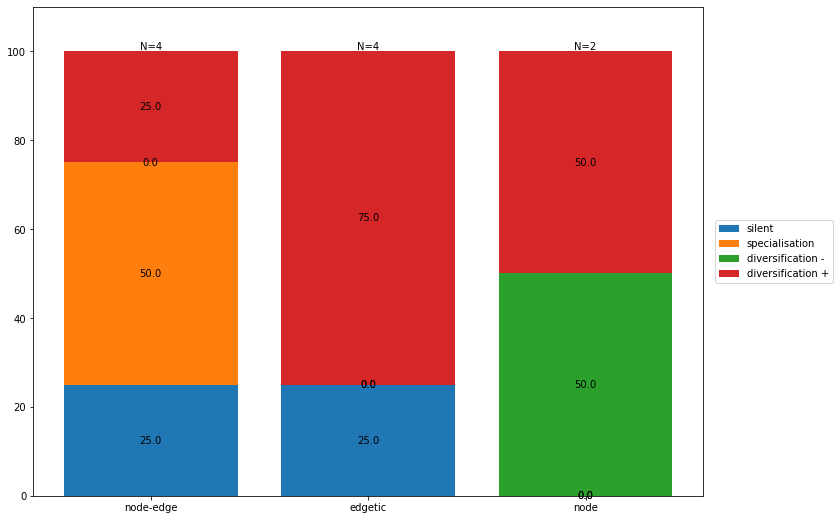

In [247]:
plt.figure(figsize=(12,9))

# stack bars
plt.bar(x, y1, label='silent')
plt.bar(x, y2 ,bottom=y1,label='specialisation')
plt.bar(x, y3 ,bottom=y1+y2,label='diversification -')
plt.bar(x, y4 ,bottom=y1+y2+y3,label='diversification +')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2+y3+y4, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,110)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

<BarContainer object of 4 artists>

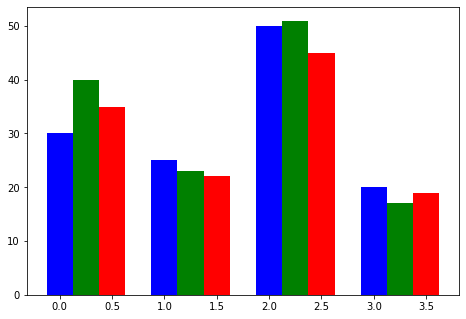